In [462]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import joblib
import tensorflow as tf

In [463]:
df = pd.read_csv(r'C:\Users\Frank\Desktop\Proyectos Linkedin\Python Proyectos\Redes Neuronales\Perceptrón Multicapa (MLP)\Clasificación Binaria\Dia 36\diabetes_dataset.csv')
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [508]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [464]:
df2 = df.copy()
print('Número de observaciones (filas) = {}'.format(df2.shape[0]))
print('Total de variables disponibles (columnas) = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo -')
print(df2.isnull().sum())

Número de observaciones (filas) = 100000
Total de variables disponibles (columnas) = 16 
Columnas que cuentan con un valor nulo -
year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64


In [465]:
df2.rename(columns={
    'race:AfricanAmerican': 'AfricaAmerican',
    'race:Asian':'Asian',
    'race:Caucasian': 'Caucasian',
    'race:Hispanic': 'Hispanic',
    'race:Other':'Other'},inplace=True)

In [466]:
df2.head()

,year,gender,age,location,AfricaAmerican,Asian,Caucasian,Hispanic,Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [467]:
df2.describe()

,year,age,AfricaAmerican,Asian,Caucasian,Hispanic,Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [468]:
df2['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [469]:
df2['location'].value_counts()

location
Iowa                    2038
Nebraska                2038
Kentucky                2038
Hawaii                  2038
Florida                 2037
Minnesota               2037
New Jersey              2037
Arkansas                2037
Delaware                2036
Kansas                  2036
Michigan                2036
Massachusetts           2036
Maine                   2036
District of Columbia    2036
Louisiana               2036
Georgia                 2036
Oregon                  2036
Pennsylvania            2036
Alabama                 2036
Illinois                2036
Rhode Island            2035
Colorado                2035
Maryland                2035
New York                2035
Connecticut             2035
Mississippi             2035
Missouri                2035
Alaska                  2035
North Carolina          2035
New Hampshire           2035
North Dakota            2035
South Dakota            2033
Montana                 2033
New Mexico              2033
Idaho

In [470]:
df2['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [471]:
df2.head()

,year,gender,age,location,AfricaAmerican,Asian,Caucasian,Hispanic,Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [472]:
# Definir caracteristicas numericas y categoricas
numeric_features = ['age','bmi','hbA1c_level','blood_glucose_level']
categorical_features = ['gender','smoking_history']

In [473]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2[numeric_features] = scaler.fit_transform(df2[numeric_features])
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [474]:
# One-Hot Encoding para características categóricas

enc = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
encoded_cats = enc.fit_transform(df2[categorical_features])
joblib.dump(enc, 'encoder.pkl')

['encoder.pkl']

In [475]:
# Crear DataFrame para las características codificadas

encoded_cats = pd.DataFrame(encoded_cats,columns=enc.get_feature_names_out(categorical_features))
df2 = pd.concat([df2,encoded_cats],axis=True)

# Preparando la red neuronal

In [476]:
df2.head()

,year,gender,age,location,AfricaAmerican,Asian,Caucasian,Hispanic,Other,hypertension,...,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,2020,Female,-0.439045,Alabama,0,0,0,0,1,0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2015,Female,-0.572279,Alabama,0,1,0,0,0,0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2015,Male,-1.060805,Alabama,0,0,0,0,1,0,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2015,Male,-0.039342,Alabama,0,0,1,0,0,0,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2016,Female,0.449184,Alabama,1,0,0,0,0,0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [477]:
# Definir X e Y
X = df2.drop(columns=['gender','location','smoking_history'])
y = df2['diabetes']

In [478]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [479]:
def build_modelo():
    oculta = tf.keras.layers.Dense(units=64,activation='relu',input_shape=[X.shape[1]])
    dropout = tf.keras.layers.Dropout(0.3)
    oculta1 = tf.keras.layers.Dense(units=32,activation='relu')
    dropout1 = tf.keras.layers.Dropout(0.3)
    salida = tf.keras.layers.Dense(units=1,activation='sigmoid')
    modelo = tf.keras.Sequential([oculta,dropout,oculta1,dropout1,salida])
    modelo.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='binary_crossentropy',metrics=['accuracy'])
    return modelo

In [480]:
modelo = build_modelo()

In [481]:
# Implementar el early_stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [482]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [483]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Realizar validación cruzada manualmente
kf = KFold(n_splits=10, shuffle=True, random_state=42)
val_scores = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    model = build_modelo()
    model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=False, validation_split=0.2, callbacks=[early_stopping])
    
    val_predictions = (model.predict(X_val) > 0.5).astype("int32")
    val_score = accuracy_score(y_val, val_predictions)
    val_scores.append(val_score)

print(f'Validación cruzada: {val_scores}')
print(f'Promedio de validación cruzada: {np.mean(val_scores)}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step
Validación cruzada: [0.914, 0.9157, 0.9187, 0.9147, 0.9153, 0.9129, 0.9136, 0.9152, 0.9189, 0.911]
Promedio de validación cruzada: 0.915


In [484]:
# Entrenal modelo final
model_final = build_modelo()
historial = model_final.fit(X_train, y_train, epochs=100, batch_size=64, verbose=False, validation_split=0.2, callbacks=[early_stopping])

In [485]:
# Evaluar el modelo final en el conjunto de prueba
test_predicciones = (model_final.predict(X_test) > 0.5).astype("int32")
test_accuracy = accuracy_score(y_test,test_predicciones)
print(f'Precision en el conjunto de entrenamiento: {test_accuracy}')

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step
Precision en el conjunto de entrenamiento: 0.91485


In [486]:
from sklearn.metrics import classification_report

# Reporte de clasificación
print('Reporte de clasificación')
print(classification_report(y_test,test_predicciones))

Reporte de clasificación
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     18297
           1       0.00      0.00      0.00      1703

    accuracy                           0.91     20000
   macro avg       0.46      0.50      0.48     20000
weighted avg       0.84      0.91      0.87     20000



625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.9149 - loss: 0.2910
Test Accuracy: 91.48%


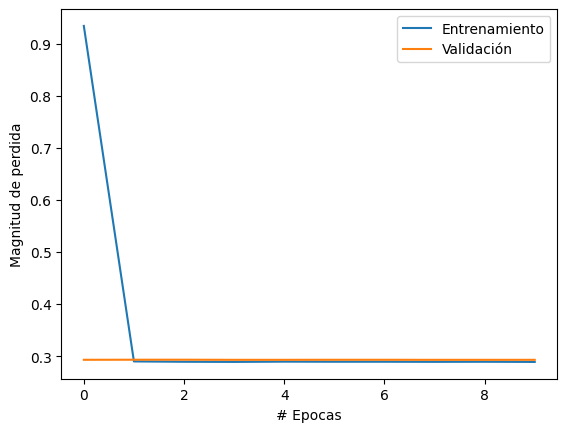

In [487]:
# Graficar la perdida del modelo final

test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_accuracy_percent = test_accuracy * 100

plt.xlabel('# Epocas')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])
plt.plot(historial.history['val_loss'])
plt.legend(['Entrenamiento','Validación'])

print(f'Test Accuracy: {test_accuracy_percent:.2f}%')

# Guardar el modelo entrenado

In [505]:
#  Modelo final
model_final = build_modelo()
historial = model_final.fit(X_train, y_train, epochs=300, batch_size=64, verbose=False, validation_split=0.2, callbacks=[early_stopping])
# Guardar el modelo entrenado
model_final.save('modelo_entrenado_v1_91%_accuracy_binario.h5')

In [506]:
# Imprimir las columnas de X_train para verificar las columnas

print('Columnas de X_train:')
for column in X_train.columns:
    print(column)

Columnas de X_train:
year
age
AfricaAmerican
Asian
Caucasian
Hispanic
Other
hypertension
heart_disease
bmi
hbA1c_level
blood_glucose_level
diabetes
gender_Female
gender_Male
gender_Other
smoking_history_No Info
smoking_history_current
smoking_history_ever
smoking_history_former
smoking_history_never
smoking_history_not current
